In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from io import StringIO


In [ ]:
df = pd.read_csv("cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Handle missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
#filling the null values at (Engine HP & Engine Cylinder) with their median and mode
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0])

# Converting data types
df['Year'] = df['Year'].astype(int)
df['Engine HP'] = df['Engine HP'].astype(float)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(float)
df['MSRP'] = df['MSRP'].astype(float)

# Removing outliers in MSRP
msrp_99 = df['MSRP'].quantile(0.99)
df = df[df['MSRP'] <= msrp_99]

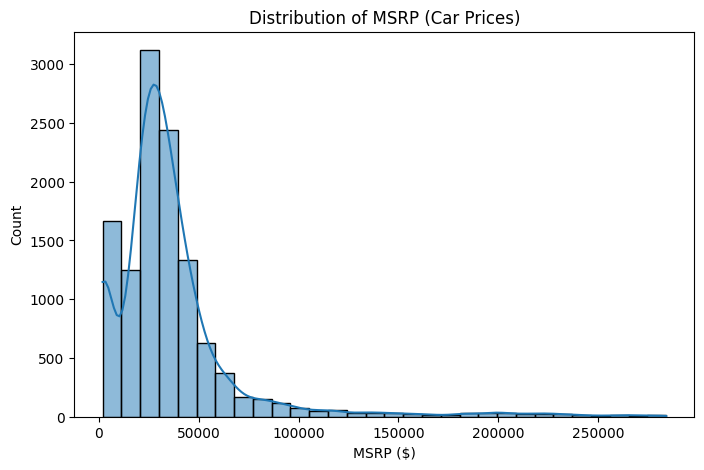

In [ ]:
# visualizing MSRP using Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['MSRP'], bins=30, kde=True)
plt.title('Distribution of MSRP (Car Prices)')
plt.xlabel('MSRP ($)')
plt.ylabel('Count')
plt.show()

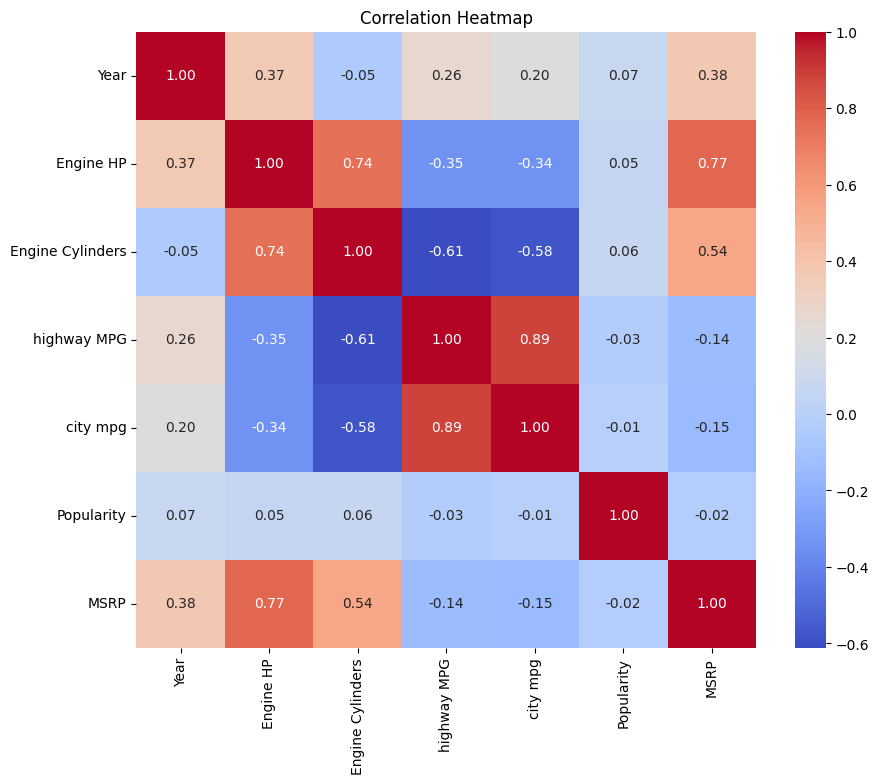

In [ ]:
# Correlation heatmap for numerical features
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#after finding a strong corrolation between Engine HP & MSRP, we will start Preprocessing
# Selecting numerical features
features = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']
X = df[features]
y = df['MSRP']

# Log-transform MSRP to reduce skewness
y_log = np.log1p(y)

In [ ]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

In [ ]:
#Simple Linear Regression:
# Picking feature with highest correlation(Engine HP) to MSRP
X_single = X_scaled[:, 1].reshape(-1, 1)
X_single_train = X_train[:, 1].reshape(-1, 1)
X_single_test = X_test[:, 1].reshape(-1, 1)


In [ ]:
# Fit model
lr_single = LinearRegression()
lr_single.fit(X_single_train, y_train)

# Predict
y_pred_single = lr_single.predict(X_single_test)
y_pred_single

array([10.34671254,  9.77558579, 10.04075178, ..., 10.24472562,
        9.34724073, 10.29911864])

In [ ]:
# Reporting metrics
r2_single = r2_score(y_test, y_pred_single)
mse_single = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_single))  # Back to original scale
print("Simple Linear Regression (Engine HP):")
print(f"R² Score: {r2_single:.4f}")
print(f"MSE: {mse_single:,.2f}")

Simple Linear Regression (Engine HP):
R² Score: 0.4363
MSE: 723,502,685.11


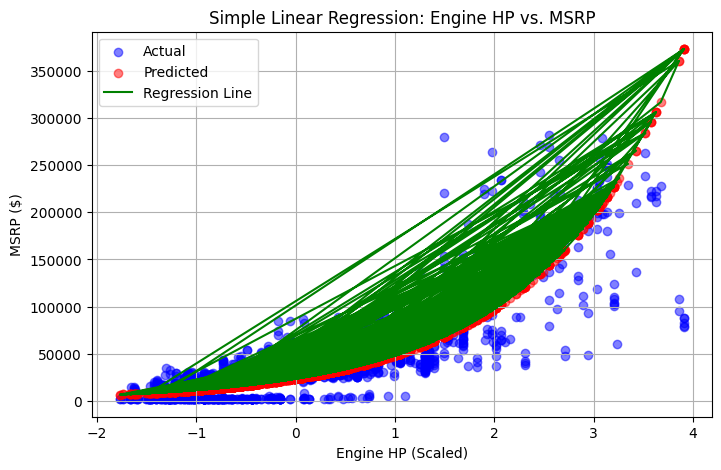

In [ ]:
# Visualizing regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_single_test, np.expm1(y_test), color='blue', alpha=0.5, label='Actual')
plt.scatter(X_single_test, np.expm1(y_pred_single), color='red', alpha=0.5, label='Predicted')
plt.plot(X_single_test, np.expm1(y_pred_single), color='green', label='Regression Line')
plt.title('Simple Linear Regression: Engine HP vs. MSRP')
plt.xlabel('Engine HP (Scaled)')
plt.ylabel('MSRP ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Multiple Linear Regression:
# Fit model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

# Predict
y_pred_multi = lr_multi.predict(X_test)
y_pred_multi

array([10.77677681,  9.60911862, 10.51000849, ..., 10.72230887,
       10.14560592, 10.75487277])

In [ ]:
# Reporting metrics
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_multi))
print("Multiple Linear Regression:")
print(f"R² Score: {r2_multi:.4f}")
print(f"MSE: {mse_multi:,.2f}")

Multiple Linear Regression:
R² Score: 0.7637
MSE: 709,603,306.91


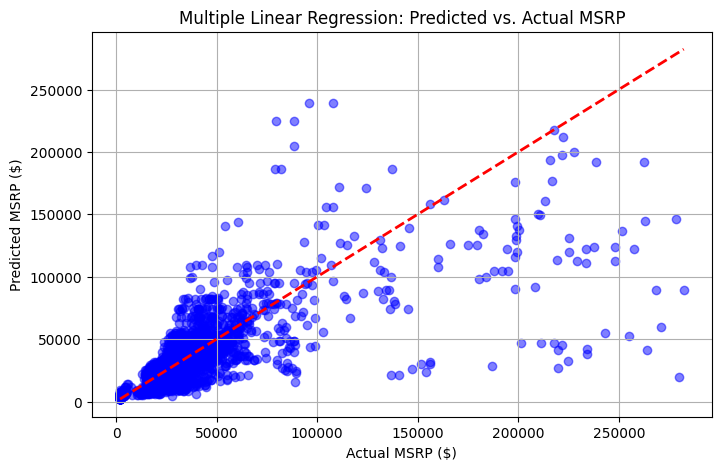

In [ ]:
# Comparing results with the simple linear regression
plt.figure(figsize=(8, 5))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_multi), color='blue', alpha=0.5)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
         [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--', lw=2)
plt.title('Multiple Linear Regression: Predicted vs. Actual MSRP')
plt.xlabel('Actual MSRP ($)')
plt.ylabel('Predicted MSRP ($)')
plt.grid(True)
plt.show()

In [ ]:
# Polynomial Regression:
# creating the Polynomial Regression with degrees 2,3,4 in a loop
degrees = [2, 3, 4]
r2_poly = []
mse_poly = []
predictions_poly = []

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_single_train)
    X_poly_test = poly.transform(X_single_test)

    # Scale polynomial features
    poly_scaler = StandardScaler()
    X_poly_train_scaled = poly_scaler.fit_transform(X_poly_train)
    X_poly_test_scaled = poly_scaler.transform(X_poly_test)

    # Fit model
    lr_poly = LinearRegression()
    lr_poly.fit(X_poly_train_scaled, y_train)

    # Predict
    y_pred_poly = lr_poly.predict(X_poly_test_scaled)
    # Metrics
    r2 = r2_score(y_test, y_pred_poly)
    mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_poly))
    r2_poly.append(r2)
    mse_poly.append(mse)
    predictions_poly.append(y_pred_poly)

    print(f"Polynomial Regression (Degree {degree}):")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:,.2f}")

Polynomial Regression (Degree 2):
R² Score: 0.4534
MSE: 552,232,124.32
Polynomial Regression (Degree 3):
R² Score: 0.4568
MSE: 563,582,632.30
Polynomial Regression (Degree 4):
R² Score: 0.4661
MSE: 468,776,599.26


In [ ]:
# Comparing the 3 Polynomial Models
print("\nPolynomial Regression Comparison:\n")
metrics_df = pd.DataFrame({
    'Degree': degrees,
    'R² Score': r2_poly,
    'MSE': mse_poly
})

print(metrics_df)



Polynomial Regression Comparison:

   Degree  R² Score           MSE
0       2  0.453354  5.522321e+08
1       3  0.456817  5.635826e+08
2       4  0.466117  4.687766e+08


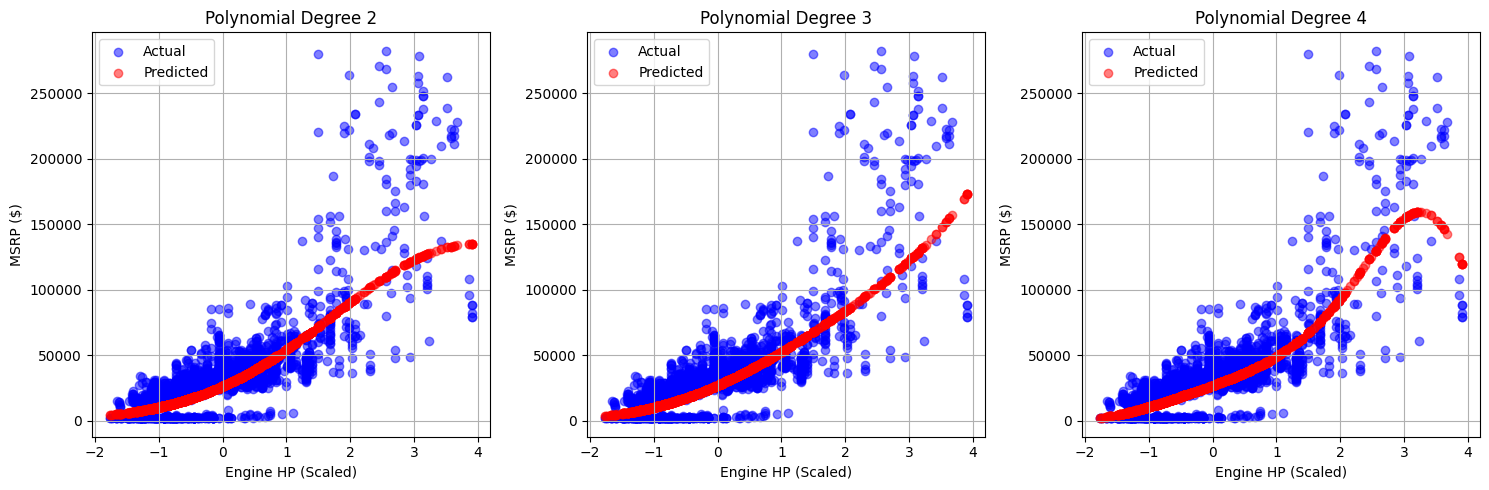

In [ ]:
# Visualizing polynomial fits
plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_single_test, np.expm1(y_test), color='blue', alpha=0.5, label='Actual')
    plt.scatter(X_single_test, np.expm1(predictions_poly[i]), color='red', alpha=0.5, label='Predicted')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('Engine HP (Scaled)')
    plt.ylabel('MSRP ($)')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-34-0c255ebc7b54>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=comparison_df, palette='Blues')
<ipython-input-34-0c255ebc7b54>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=comparison_df, palette='Reds')


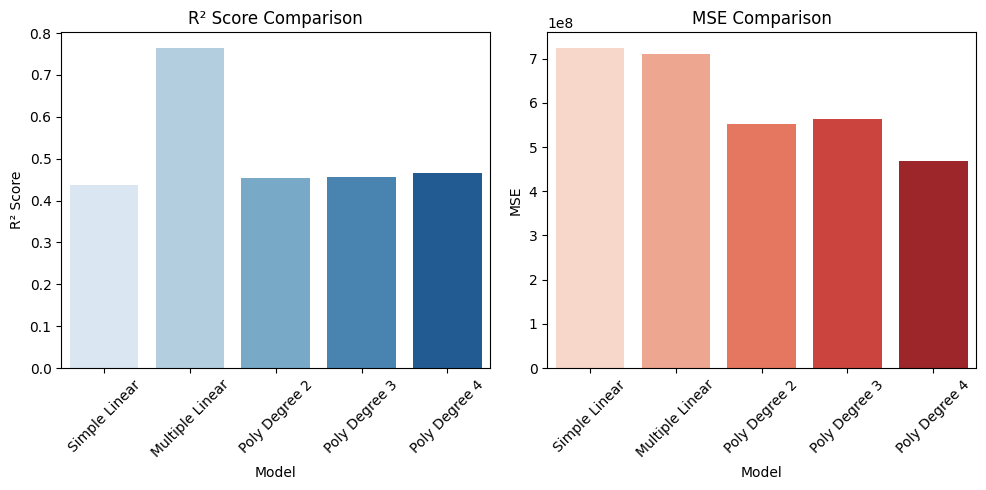

In [ ]:
# Bar Plot for Model Comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=comparison_df, palette='Blues')
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSE', data=comparison_df, palette='Reds')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Model Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['Simple Linear', 'Multiple Linear', 'Poly Degree 2', 'Poly Degree 3', 'Poly Degree 4'],
    'R² Score': [r2_single, r2_multi] + r2_poly,
    'MSE': [mse_single, mse_multi] + mse_poly
})
print("\nAll models Comparison:\n")
print(comparison_df)


All models Comparison:

             Model  R² Score           MSE
0    Simple Linear  0.436257  7.235027e+08
1  Multiple Linear  0.763696  7.096033e+08
2    Poly Degree 2  0.453354  5.522321e+08
3    Poly Degree 3  0.456817  5.635826e+08
4    Poly Degree 4  0.466117  4.687766e+08


In [1]:
#Conclusion: Multiple Linear Regression was the best in combining features.
#Polynomial reggresion (degree 4) offers the best single-feature (Engine HP) performance.
# All models vastly outperform the baseline, highlighting the importance of feature selection and preprocessing.